# Preliminary analysis of data 1.0

## Import packages

In [1070]:
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain
import pandas as pd 
from matplotlib import pyplot as plt
import json
from urllib.request import urlopen
from genderize import Genderize
import gender_guesser.detector as gender
import pycountry
import re
import numpy as np


## Import data

In [4]:
%%time

physics_data=[]

query = Works().search_filter(abstract="physics") \
        .filter(type='article') \
        .filter(publication_year="2023")

for record in chain(*query.paginate(n_max=None)):
    physics_data.append(record)


CPU times: user 1min 10s, sys: 9.13 s, total: 1min 19s
Wall time: 23min 13s


In [5]:
data=pd.DataFrame(physics_data)

In [6]:
data.head(3)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,primary_location,...,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin
0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,The Forward Physics Facility at the High-Lumin...,The Forward Physics Facility at the High-Lumin...,147.0863,2023,2023-01-20,{'openalex': 'https://openalex.org/W4225725984...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,1410,"[https://openalex.org/W9098236, https://openal...","[https://openalex.org/W1965606709, https://ope...",https://api.openalex.org/works/W4225725984/ngrams,"{'High': [0, 140], 'energy': [1], 'collisions'...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 26}, {'year'...",2023-10-06T15:48:10.966778,2022-05-05,NaN
1,https://openalex.org/W4313491438,https://doi.org/10.1016/j.rinp.2022.106193,Physics of crystal lattices and plasma; analyt...,Physics of crystal lattices and plasma; analyt...,142.0790,2023,2023-01-01,{'openalex': 'https://openalex.org/W4313491438...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,64,"[https://openalex.org/W1970496060, https://ope...","[https://openalex.org/W1982522977, https://ope...",https://api.openalex.org/works/W4313491438/ngrams,"{'In': [0], 'this': [1, 140], 'study,': [2], '...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 34}]",2023-10-05T08:52:40.033068,2023-01-06,NaN
2,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,Advances in QED with intense background fields,Advances in QED with intense background fields,135.6932,2023,2023-04-01,{'openalex': 'https://openalex.org/W4322490984...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,921,"[https://openalex.org/W51986920, https://opena...","[https://openalex.org/W2033990039, https://ope...",https://api.openalex.org/works/W4322490984/ngrams,"{'Upcoming': [0], 'and': [1, 8, 50, 74, 79, 10...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 34}, {'year'...",2023-10-05T21:01:48.356998,2023-02-28,NaN


In [7]:
len(data)

29458

## Organise data

In [8]:
data.rename(columns={'id': 'article_id'}, inplace=True)

In [9]:
data.columns

Index(['article_id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'open_access',
       'authorships', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid',
       'is_authors_truncated', 'has_fulltext', 'cited_by_count', 'biblio',
       'is_retracted', 'is_paratext', 'concepts', 'mesh', 'locations_count',
       'locations', 'best_oa_location', 'sustainable_development_goals',
       'grants', 'referenced_works_count', 'referenced_works', 'related_works',
       'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url',
       'counts_by_year', 'updated_date', 'created_date', 'fulltext_origin'],
      dtype='object')

In [117]:
primary_journal_location=data.primary_location.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2372476343.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  primary_journal_location=data.primary_location.apply(pd.Series)


In [160]:
primary_journal_source=primary_journal_location.source.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2054628083.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  primary_journal_source=primary_journal_location.source.apply(pd.Series)


In [103]:
abstract=[]

for i in range(len(data)):
    abstract.append(physics_data[i]['abstract'])

## Article data

In [106]:
article_data=data[['article_id', 'doi', 'publication_year', 'publication_date', 'language', 'title', 'cited_by_count', 'countries_distinct_count', 'institutions_distinct_count']]

#also add
#institution country 
#article country 

In [107]:
article_data['abstract']=abstract

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3565299574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['abstract']=abstract


In [108]:
article_data['journal_id']=primary_journal_source['id']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2024416592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['journal_id']=primary_journal_source['id']


In [109]:
article_data['journal_name']=primary_journal_source['display_name']


/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2625750207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['journal_name']=primary_journal_source['display_name']


In [110]:
article_data.head(3)

,article_id,doi,publication_year,publication_date,language,title,cited_by_count,countries_distinct_count,institutions_distinct_count,abstract,journal_id,journal_name
0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,2023,2023-01-20,en,The Forward Physics Facility at the High-Lumin...,28,27,163,High energy collisions at the High-Luminosity ...,https://openalex.org/S78376336,Journal of Physics G
1,https://openalex.org/W4313491438,https://doi.org/10.1016/j.rinp.2022.106193,2023,2023-01-01,en,Physics of crystal lattices and plasma; analyt...,34,2,2,"In this study, we use cutting-edge analytical ...",https://openalex.org/S2764941219,Results in Physics
2,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,2023,2023-04-01,en,Advances in QED with intense background fields,39,5,10,Upcoming and planned experiments combining inc...,https://openalex.org/S48633963,Physics Reports


## Author data

In [503]:
author_data=data[['article_id', 'doi']]

In [504]:
total_author_counts=[]

for i in range(len(data)):
    total_author_counts.append(len(data.iloc[i]['authorships']))

author_data['total_author_counts']=total_author_counts

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/1569314939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['total_author_counts']=total_author_counts


In [505]:
authorships=data.authorships.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/1368832579.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  authorships=data.authorships.apply(pd.Series)


In [506]:
authorships=authorships.add_prefix('author_position_')

In [507]:
first_author=authorships.author_position_0.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/1792976435.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  first_author=authorships.author_position_0.apply(pd.Series)


In [508]:
first_author_info=first_author.author.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2058171524.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  first_author_info=first_author.author.apply(pd.Series)


In [509]:
first_author_info=first_author_info.add_prefix('first_author_')

In [510]:
first_author_institution=first_author.institutions.apply(pd.Series)
first_author_institution=first_author_institution.add_prefix('first_author_institution_')

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3227823167.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  first_author_institution=first_author.institutions.apply(pd.Series)


In [511]:
first_author_first_institution=first_author_institution.first_author_institution_0.apply(pd.Series)

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/765701683.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  first_author_first_institution=first_author_institution.first_author_institution_0.apply(pd.Series)


In [512]:
first_author_first_institution=first_author_first_institution.add_prefix('first_author_instit_')

In [513]:
first_author_first_institution['first_author_instit_id']

0         https://openalex.org/I204250578
1        https://openalex.org/I4210132304
2         https://openalex.org/I887846188
3         https://openalex.org/I130828816
4          https://openalex.org/I22299242
                       ...               
29453                                 NaN
29454    https://openalex.org/I4210142077
29455     https://openalex.org/I159385669
29456      https://openalex.org/I74801974
29457      https://openalex.org/I67581229
Name: first_author_instit_id, Length: 29458, dtype: object

In [514]:
author_data['first_author_id']=first_author_info['first_author_id']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2458681830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_id']=first_author_info['first_author_id']


In [515]:
first_author['raw_author_name']=first_author['raw_author_name'].fillna(value='Unknown')

In [516]:
author_data['first_author_raw_name']=first_author['raw_author_name']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/649965108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_raw_name']=first_author['raw_author_name']


In [533]:
first_author['countries'] = [["Unknown"] if x == [] else x for x in first_author['countries']]

In [534]:
first_author['countries'] = first_author['countries'].fillna(value="Unknown")

In [898]:
first_country=[]
for i in range(len(first_author)):
    first_country.append(first_author['countries'][i][0])

'RO'

In [899]:
author_data['first_author_first_country']=first_country

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3992504853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_first_country']=first_country


In [900]:
first_country[1159]

'RO'

In [901]:
author_data['first_author_first_country'][1159]

'RO'

In [545]:
#author_data['first_author_countries']=author_data['first_author_countries'].fillna(value='Unknown')

In [612]:
author_data['first_author_institution_id']=first_author_first_institution['first_author_instit_id']
author_data['first_author_institution_name']=first_author_first_institution['first_author_instit_display_name']
author_data['first_author_institution_country']=first_author_first_institution['first_author_instit_country_code']


/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3092790986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_institution_id']=first_author_first_institution['first_author_instit_id']
/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3092790986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_institution_name']=first_author_first_institution['first_author_instit_display_name']
/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000

In [613]:
first_author_surname=[]

for i in range(len(author_data)):
    first_author_surname.append(author_data.iloc[i]['first_author_raw_name'].split()[0])

author_data['first_author_surname']=first_author_surname

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/3864297336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_surname']=first_author_surname


In [ ]:
#convert contry codes to contry names 

In [947]:
    countries = {}

    #loops over all of the countries contained in the pycountry library and populates dictionary
    for country in pycountry.countries:
        countries[country.alpha_2] = country.name

In [948]:
codes_to_name = []

for i in author_data['first_author_first_country']:
    if i in countries.keys():
        codes_to_name.append(countries.get(i).lower())
    else:
        codes_to_name.append('other_countries')

In [949]:
author_data['first_author_first_country_name']=codes_to_name

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/4156069065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_first_country_name']=codes_to_name


In [950]:
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('united states', 'usa', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('united kingdom', 'great_britain', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('russian federation', 'russia', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('netherlands', 'the_netherlands', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('canada', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('saudi arabia', 'arabia', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('egypt', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('australia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('morocco', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('united arab emirates', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('singapore', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('switzerland', 'swiss', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('pakistan', 'the_stans', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('kazakhstan', 'the_stans', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('kyrgyzstan', 'the_stans', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('iran, islamic republic of', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('indonesia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('korea, republic of', 'korea', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('bangladesh', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('south africa', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('hong kong', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('malaysia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('jordan', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('taiwan, province of china', 'china', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('czechia', 'czech_republic', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('viet nam', 'vietnam', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('nigeria', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('argentina', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('algeria', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('bosnia and herzegovina', 'bosniaand', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('north macedonia', 'macedonia', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('philippines', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('tunisia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('new zealand', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('kuwait', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('uzbekistan', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('rwanda', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('ethiopia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('ecuador', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('peru', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('ghana', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('kenya', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('lebanon', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('cyprus', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('uruguay', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('sri lanka', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('sudan', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('nepal', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('senegal', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('mongolia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('qatar', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('mali', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('cameroon', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('panama', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('panama', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('bhutan', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('bahrain', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('tanzania, united republic of', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('costa rica', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('libya', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('zambia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('lesotho', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('gambia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('paraguay', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('myanmar', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('zimbabwe', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('uganda', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('venezuela, bolivarian republic of', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('botswana', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('mauritius', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('mozambique', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('congo, the democratic republic of the', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('cuba', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('réunion', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('macao', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('yemen', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('iraq', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('thailand', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('brazil', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('colombia', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('chile', 'other_countries', x))
author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('mexico', 'other_countries', x))

author_data['first_author_first_country_name'][author_data['first_author_first_country_name']=='oman']='other_countries'

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2141170267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda x: re.sub('united states', 'usa', x))
/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2141170267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_first_country_name'] = author_data['first_author_first_country_name'].apply(lambda 

In [951]:
detector=gender.Detector(case_sensitive=False)

In [958]:
#loop over names to get gender 
first_author_gender=[]
for i in range(len(author_data)):
    first_author_gender.append(detector.get_gender(author_data['first_author_surname'][i], author_data['first_author_first_country_name'][i]))

author_data['first_author_gender']=first_author_gender

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/2546283766.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_gender']=first_author_gender


In [959]:
author_data['first_author_gender'].value_counts()

first_author_gender
unknown          15416
andy              9108
male              3591
female             973
mostly_male        244
mostly_female      126
Name: count, dtype: int64

In [962]:
#loop over names to get gender 
first_author_gender_test=[]
for i in range(len(author_data)):
    first_author_gender_test.append(detector.get_gender(author_data['first_author_surname'][i]))

author_data['first_author_gender_test']=first_author_gender_test

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_38921/1544670881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_gender_test']=first_author_gender_test


In [963]:
author_data['first_author_gender_test'].value_counts()

first_author_gender_test
unknown          15416
male              7540
andy              3628
female            2258
mostly_male        411
mostly_female      205
Name: count, dtype: int64

## Plotting

### Define functions

In [1062]:
def Sturges_bins(data):
    
    """
    INPUT:
    data = 1d array of all data
    
    OUTPUT:
    k = number of bins to use
    """
    
    # Number of data
    N = len(data)
    
    # Number of bins
    k = int( np.ceil( np.log2(N) ) + 1 )
    
    return k

In [1081]:
def hist(data, label=None, N_bins=None, ax=None):
    
    """
    Creates histogram of data with errors and nice bins 

    INPUT:
    data = 1d array of all data points
    label = label to put on xaxis
    N_bins = number of bins, if not stated it will use Sturges formula
    ax = optional ax to plot on, if not stated will create a new figure
    
    OUTPUT:
    Histogram
    """
    
    # Create a figure if needed
    if ax is None: fig, ax = plt.subplots(figsize=(12,6))

    # Extract values from histogram and outline data
    if N_bins is None: N_bins = Sturges_bins(data)
    counts, bin_edges,_ = ax.hist(data, bins=N_bins, alpha=0.3, label=label)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    binwidth = bin_edges[1] - bin_edges[0]
    plt.margins(x=0)

    if N_bins>10: plt.xticks(rotation = 50, size=10)
    

    # Poisson errors on the count in each bin
    s_counts = np.sqrt(counts)
    
    # We remove any bins, which don't have any counts in them:
    x = bin_centers[counts>0]
    y = counts[counts>0]
    sy = s_counts[counts>0]

    # Plot data with error
    ax.errorbar(x, y, yerr=sy, fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1, label='Counts with Poisson errors')
    plt.legend()
    plt.show()
    

### Plots

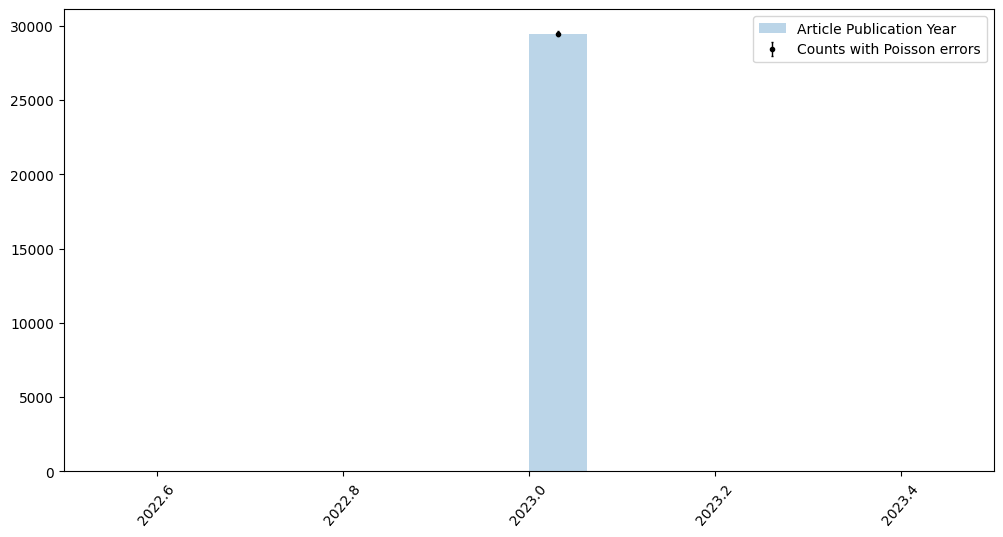

In [1082]:
hist(article_data['publication_year'], label='Article Publication Year', N_bins=None, ax=None)

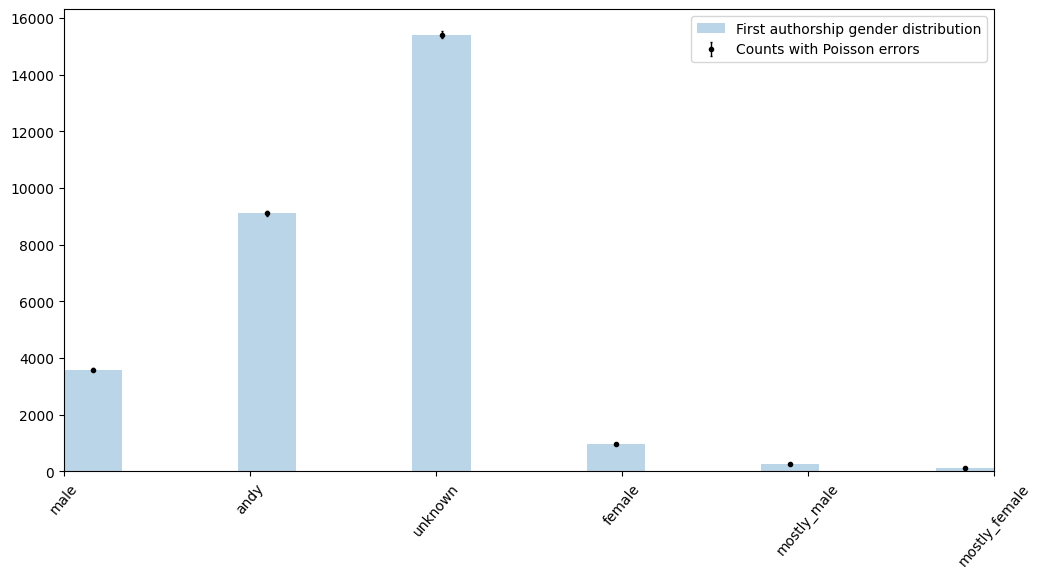

In [1083]:
hist(author_data['first_author_gender'], label='First authorship gender distribution')

In [1150]:
max(article_data['cited_by_count'])

68

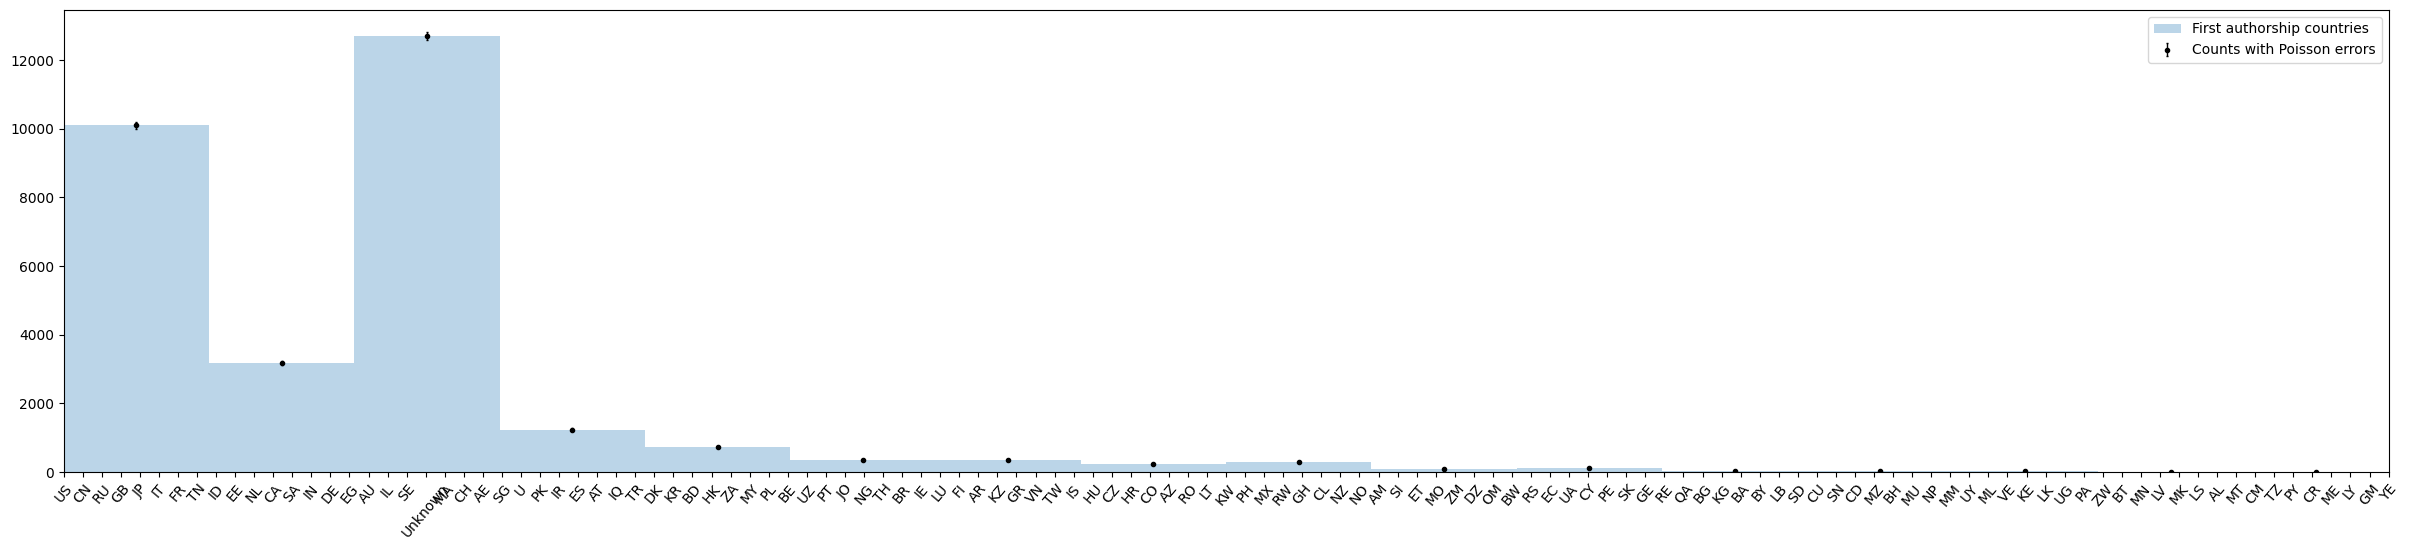

In [1092]:
fig, ax_country = plt.subplots(figsize=(30,6))
hist(author_data['first_author_first_country'], label='First authorship countries', ax=ax_country)

In [1141]:
first_author_count=author_data['first_author_id'].value_counts().reset_index()
first_author_count

,first_author_id,count
0,https://openalex.org/A5090405149,23
1,https://openalex.org/A5052282457,15
2,https://openalex.org/A5083650721,12
3,https://openalex.org/A5081730437,11
4,https://openalex.org/A5068436754,11
...,...,...
25544,https://openalex.org/A5029052788,1
25545,https://openalex.org/A5015138770,1
25546,https://openalex.org/A5092555896,1
25547,https://openalex.org/A5031483947,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'https://openalex.org/A5090405149'),
  Text(1, 0, 'https://openalex.org/A5052282457'),
  Text(2, 0, 'https://openalex.org/A5083650721'),
  Text(3, 0, 'https://openalex.org/A5081730437'),
  Text(4, 0, 'https://openalex.org/A5068436754'),
  Text(5, 0, 'https://openalex.org/A5005803001'),
  Text(6, 0, 'https://openalex.org/A5081673626'),
  Text(7, 0, 'https://openalex.org/A5069509278'),
  Text(8, 0, 'https://openalex.org/A5090231085'),
  Text(9, 0, 'https://openalex.org/A5078839699')])

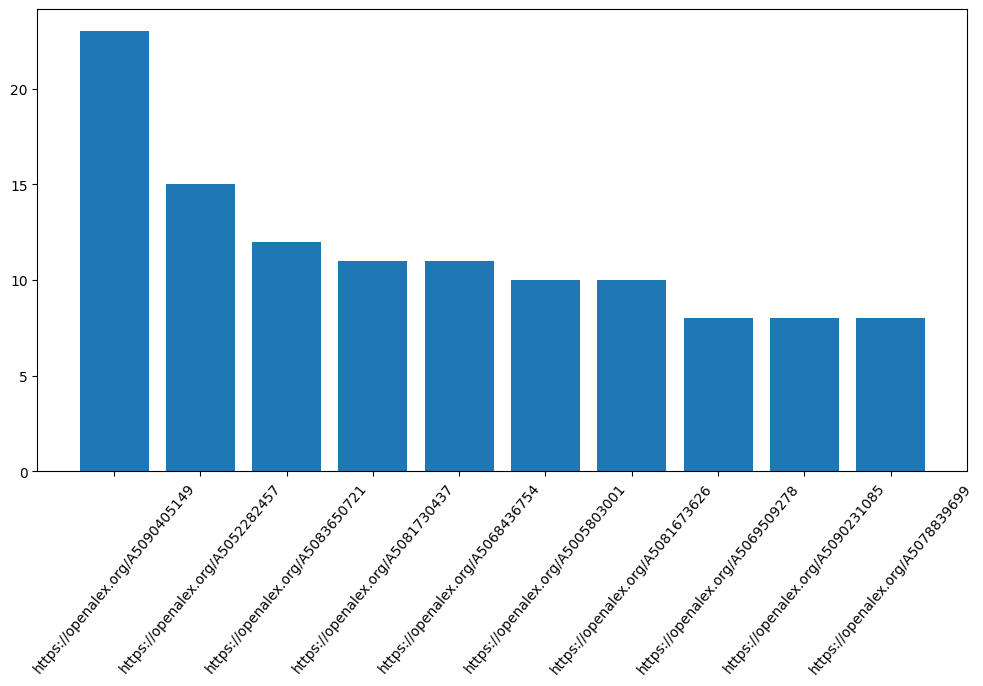

In [1140]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(first_author_count['first_author_id'][0:10], first_author_count['count'][0:10], align='center')
plt.xticks(rotation = 50, size=10)


In [1133]:
author_data[author_data['first_author_id']=='https://openalex.org/A5090405149']

,article_id,doi,total_author_counts,first_author_id,first_author_raw_name,first_author_first_country,first_author_first_country_name,first_author_institution_id,first_author_institution_name,first_author_institution_country,first_author_surname,first_author_gender,first_author_gender_test
5072,https://openalex.org/W3164692260,https://doi.org/10.31219/osf.io/gqtf7,1,https://openalex.org/A5090405149,Stephane H. Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
5153,https://openalex.org/W3161441687,https://doi.org/10.31219/osf.io/vkmj5,1,https://openalex.org/A5090405149,Stephane H. Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
12258,https://openalex.org/W3214081247,https://doi.org/10.31219/osf.io/mcxb5,1,https://openalex.org/A5090405149,Stephane H. Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13261,https://openalex.org/W4323363917,https://doi.org/10.31219/osf.io/7tpxk,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13621,https://openalex.org/W4324378566,https://doi.org/10.31219/osf.io/jtfsr,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13702,https://openalex.org/W4327715140,https://doi.org/10.31219/osf.io/xc74t,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13704,https://openalex.org/W4327733760,https://doi.org/10.31219/osf.io/krw7g,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13778,https://openalex.org/W4327734437,https://doi.org/10.31219/osf.io/xun82,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
13823,https://openalex.org/W4327860951,https://doi.org/10.31219/osf.io/862we,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
14068,https://openalex.org/W4360619024,https://doi.org/10.31219/osf.io/y8fpd,1,https://openalex.org/A5090405149,Stephane Maes,Unknown,other_countries,NaN,NaN,NaN,Stephane,unknown,unknown
